In [1]:
# make the challenge sets for tutorial 2

In [3]:
mass = [36, 6, 22, 50, 1.4]
snr = [20, 10, 20, 10, 8]
time = [118, 113, 107, 116, 115]

In [4]:
from pycbc.waveform import get_fd_waveform
from pycbc.noise.reproduceable import noise_from_string
import pycbc.psd
from pycbc.filter import resample_to_delta_t

ts = noise_from_string("aLIGOZeroDetLowPower", 0, 128, seed=0, low_frequency_cutoff=10)
ts = resample_to_delta_t(ts, 1.0/4096)
print ts.duration
ts.start_time = 0

128.0


0.0078125 0.0078125


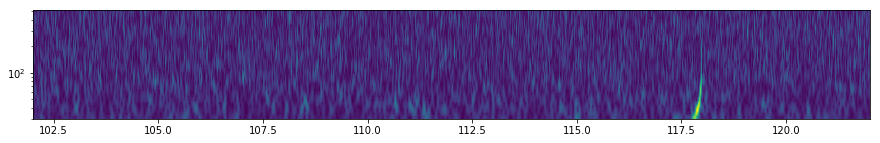

0.0078125 0.0078125


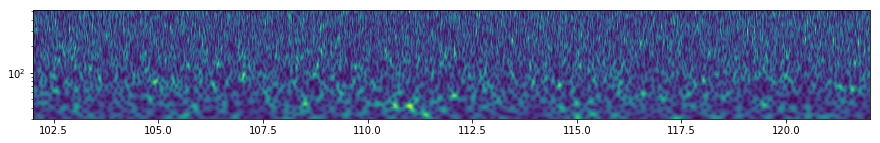

0.0078125 0.0078125


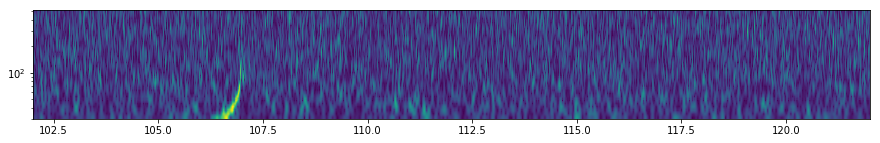

0.0078125 0.0078125


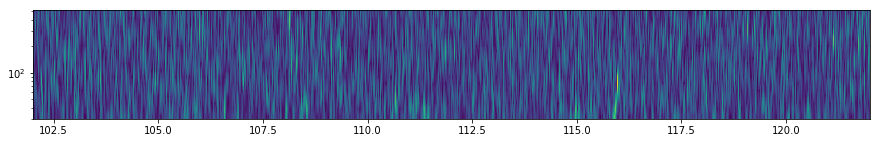

0.0078125 0.0078125


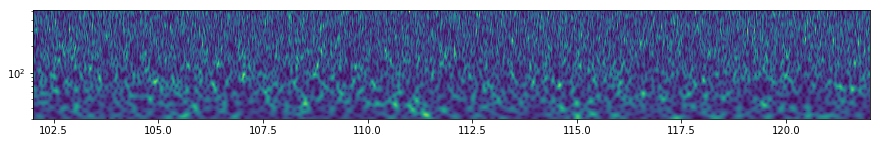

In [5]:
from pycbc.filter import sigma
from pycbc.frame import write_frame
import pylab
data = []

psd = pycbc.psd.aLIGOZeroDetLowPower(128 * 4096 / 2 + 1, 1.0/128, 10)

for i, (m, s, t) in enumerate(zip(mass, snr, time)):
    hp, hc = get_fd_waveform(mass1=m, mass2=m, approximant="IMRPhenomD", f_lower=15, delta_f=1.0/128)
    fs = ts.to_frequencyseries()
    hp.resize(len(fs))

    print hp.delta_f, fs.delta_f
    sig = pycbc.filter.sigma(hp, psd=psd, low_frequency_cutoff=15)

    fs += hp.cyclic_time_shift(t) / sig * s
    
    
    ts2 = fs.to_timeseries()
    data.append(ts2)
    
    write_frame('PyCBC_T2_%s.gwf' % i, 'H1:TEST-STRAIN', ts2)
    
    ts2 = ts2.time_slice(100, 124)
    tsw = ts2.whiten(4, 4)
    pylab.figure(figsize=[15, 2])
    t, f, p = tsw.qtransform(.001, logfsteps=100, qrange=(4, 64), frange=(30, 512))
    pylab.pcolormesh(t, f, p**0.5)
    #pylab.xlim(8, 24)
    pylab.yscale('log')
    pylab.show()